In [1]:
import torch as th

from torchvision import transforms
from torchvision.models import alexnet

In [2]:
from src.dataloader import customDataloader
from src.utils import train_loop, test_model, init_weights
from src.plots import plot_statistics
from models.model import Model

# Exercise 1

In [37]:
transform = None

In [38]:
train_loader, validation_loader, test_loader = customDataloader(transform=[transform, transform], batch_size=32, shuffle=True)

In [44]:
model = Model()
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.SGD(model.parameters(), momentum=0.5)

In [45]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, early_stopping=True)

 79%|██████████▎  | 79/100 [00:09<00:02,  8.72it/s, Train Loss=0.0979, Test Loss=6.55, Train Acc=0.985, Test Acc=0.258]

Stopped early, epoch: 79


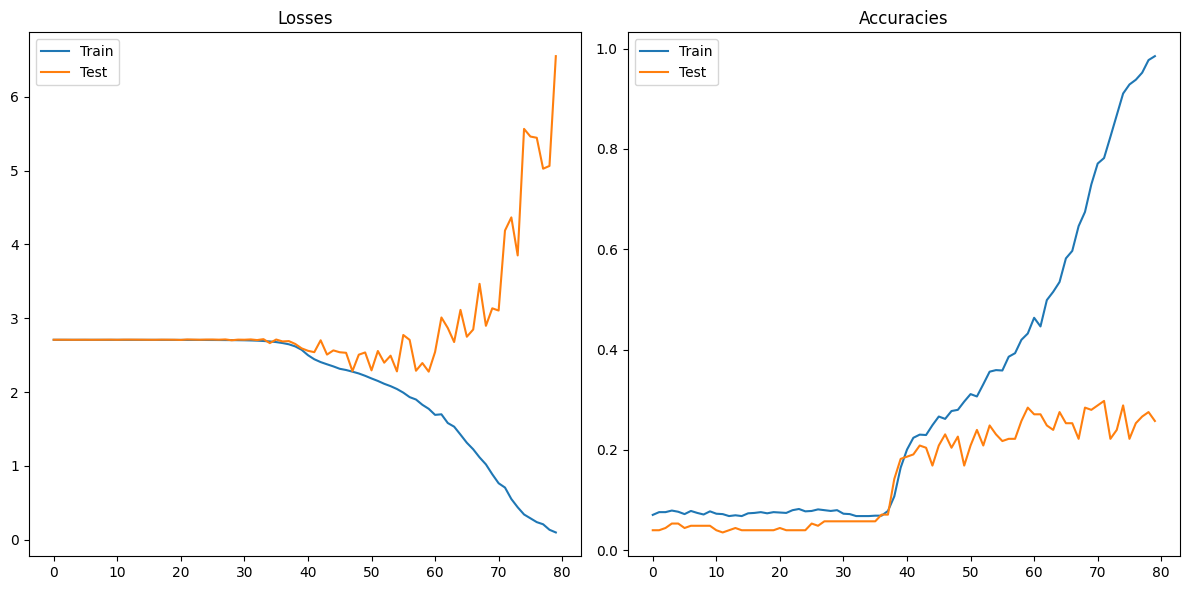

In [46]:
plot_statistics(statistics)

Test Loss: 5.878068447113037
Test Accuracy: 0.2529313266277313


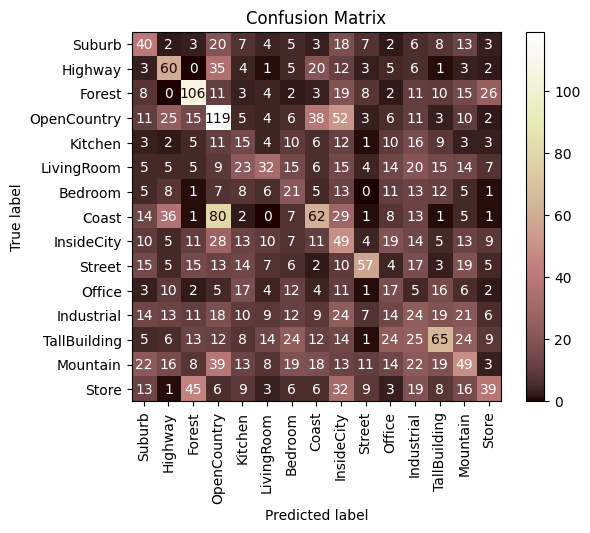

In [47]:
test_model(model, test_loader, criterion)

# Exercise 2

In [48]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
])
test_transform = None

In [49]:
train_loader, validation_loader, test_loader = customDataloader(transform=[transform, test_transform], batch_size=32, shuffle=True)

## Horizontal Flip

In [50]:
model = Model()
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.SGD(model.parameters(), momentum=0.5)

In [51]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, early_stopping=True)

 58%|████████▋      | 58/100 [00:09<00:06,  6.07it/s, Train Loss=1.23, Test Loss=2.29, Train Acc=0.607, Test Acc=0.311]

Stopped early, epoch: 58


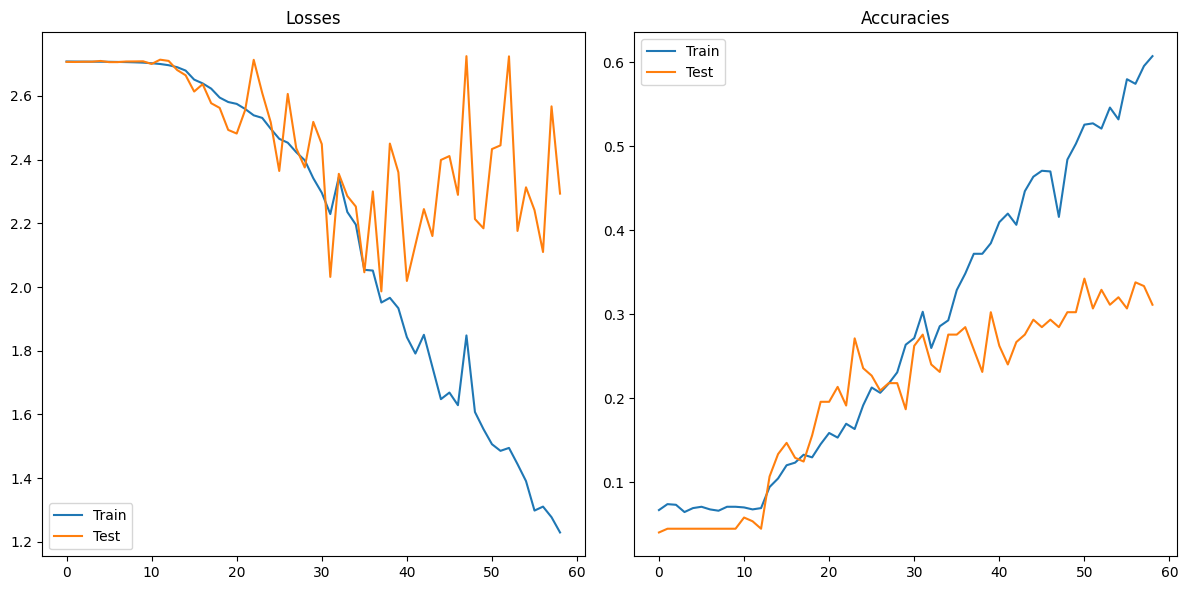

In [52]:
plot_statistics(statistics)

Test Loss: 2.4763965606689453
Test Accuracy: 0.27939698100090027


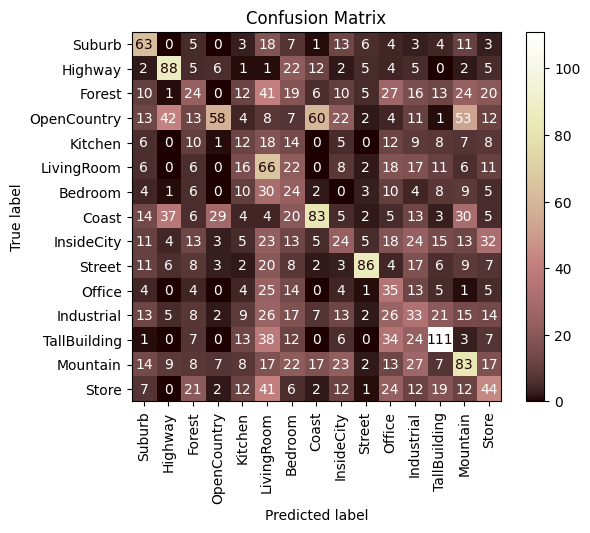

In [53]:
test_model(model, test_loader, criterion)

## Batch Normalization
Kernel Size = 3


In [54]:
model = Model(normalization=True)
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.SGD(model.parameters(), momentum=0.5)

In [55]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, early_stopping=True)

100%|███████████████| 100/100 [00:18<00:00,  5.48it/s, Train Loss=0.195, Test Loss=2.2, Train Acc=0.98, Test Acc=0.471]


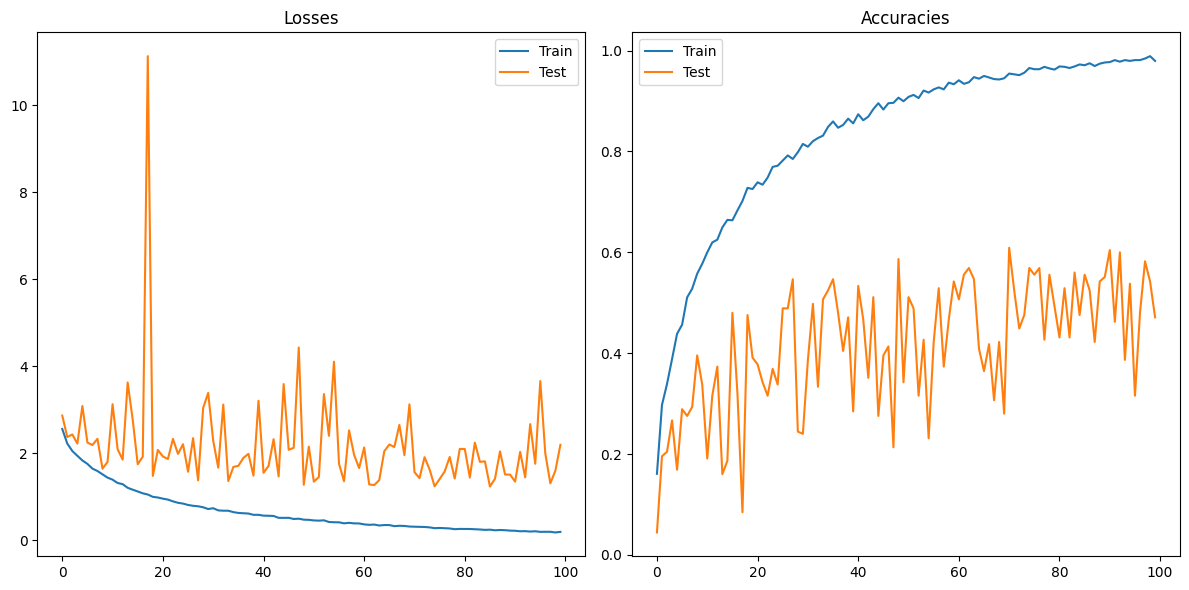

In [56]:
plot_statistics(statistics)

Test Loss: 1.7801917791366577
Test Accuracy: 0.48408710956573486


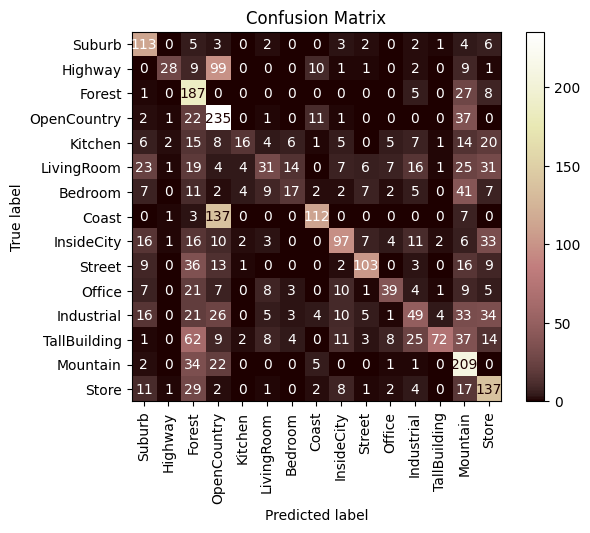

In [57]:
test_model(model, test_loader, criterion)

## Batch Normalization 
Kernel Size = 5

In [58]:
model = Model(kernel_size=5, normalization=True)
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.SGD(model.parameters(), momentum=0.5)

In [59]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, early_stopping=True)

 89%|████████████▍ | 89/100 [00:16<00:02,  5.42it/s, Train Loss=0.335, Test Loss=1.71, Train Acc=0.941, Test Acc=0.556]

Stopped early, epoch: 89


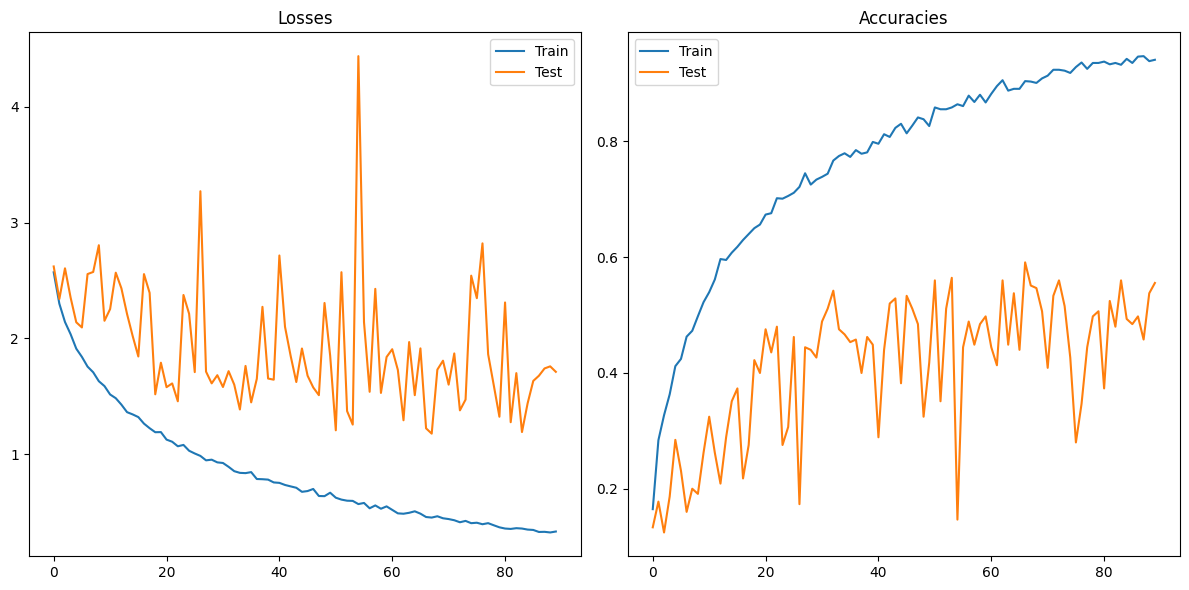

In [60]:
plot_statistics(statistics)

Test Loss: 1.3624987602233887
Test Accuracy: 0.5651591420173645


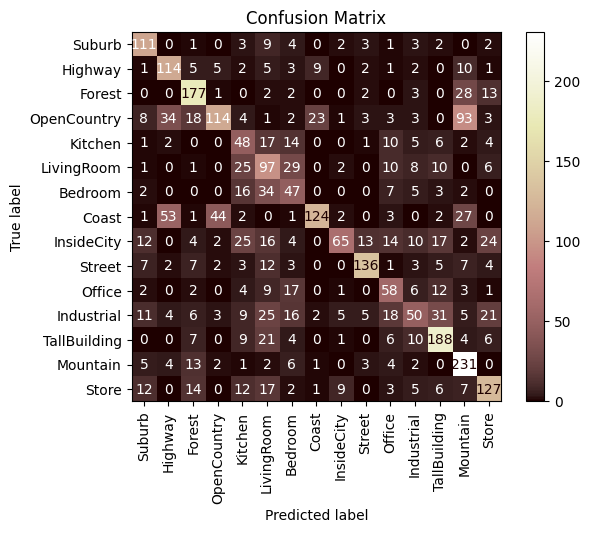

In [61]:
test_model(model, test_loader, criterion)

## Batch Normalization 
Kernel Size = 7

In [62]:
model = Model(kernel_size=7, normalization=True)
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.SGD(model.parameters(), momentum=0.5)

In [63]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, early_stopping=True)

 82%|███████████▍  | 82/100 [00:15<00:03,  5.35it/s, Train Loss=0.563, Test Loss=1.54, Train Acc=0.864, Test Acc=0.493]

Stopped early, epoch: 82


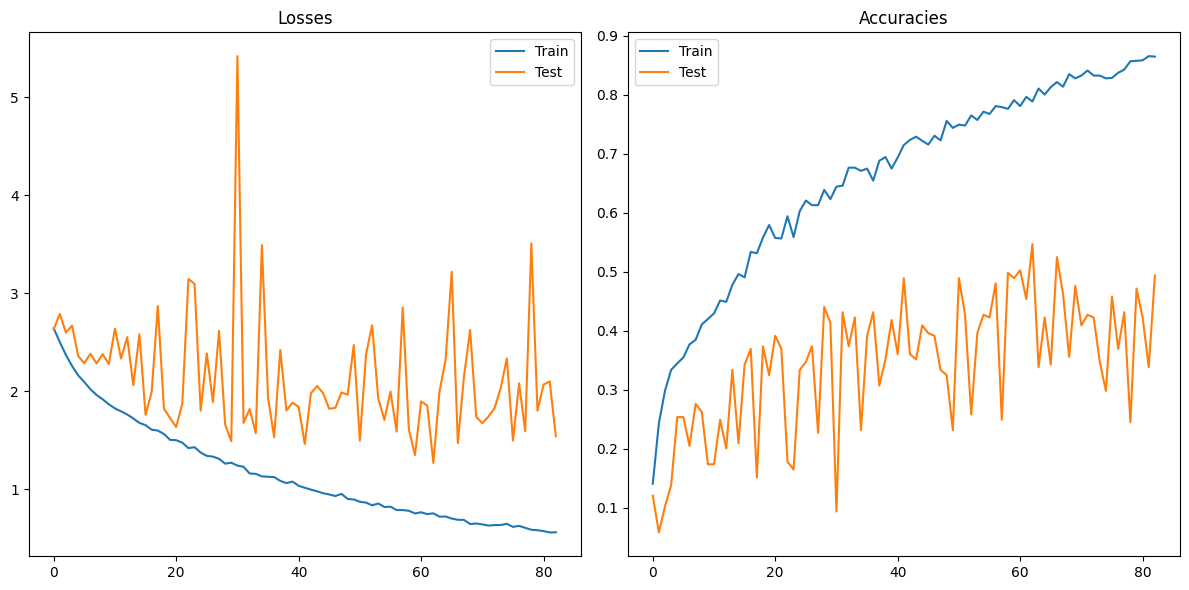

In [64]:
plot_statistics(statistics)

Test Loss: 1.5368695259094238
Test Accuracy: 0.5165829062461853


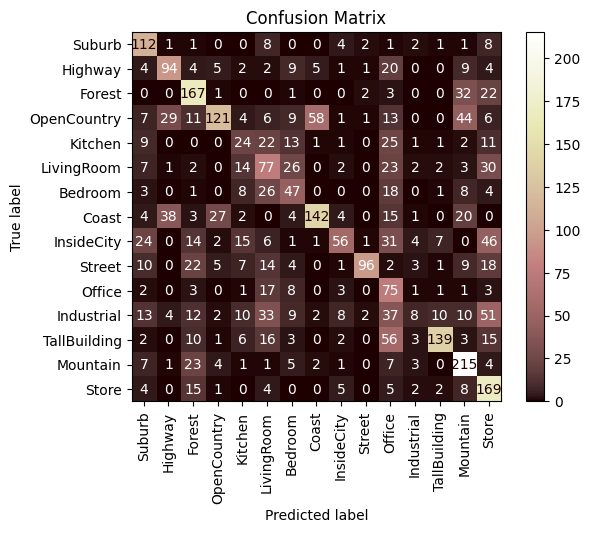

In [65]:
test_model(model, test_loader, criterion)

## Batch Normalization + Adam
Kernel Size = 3


In [66]:
model = Model(kernel_size=3, normalization=True)
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters())

In [67]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, early_stopping=True)

 34%|████▍        | 34/100 [00:06<00:12,  5.21it/s, Train Loss=0.0251, Test Loss=1.85, Train Acc=0.998, Test Acc=0.524]

Stopped early, epoch: 34


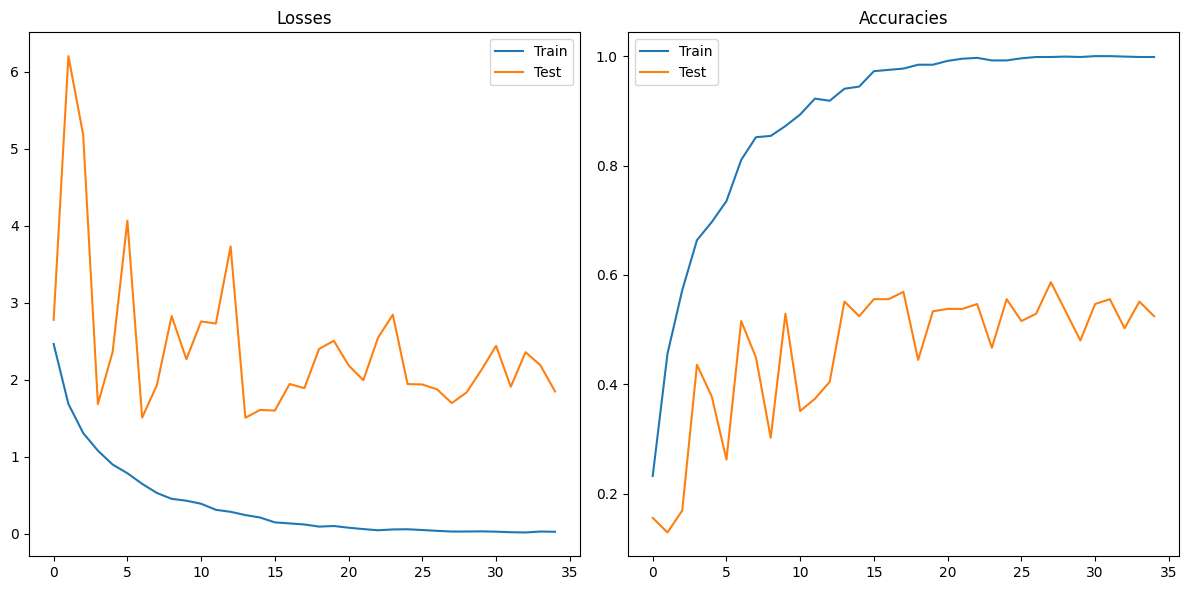

In [68]:
plot_statistics(statistics)

Test Loss: 1.8417446613311768
Test Accuracy: 0.5675041675567627


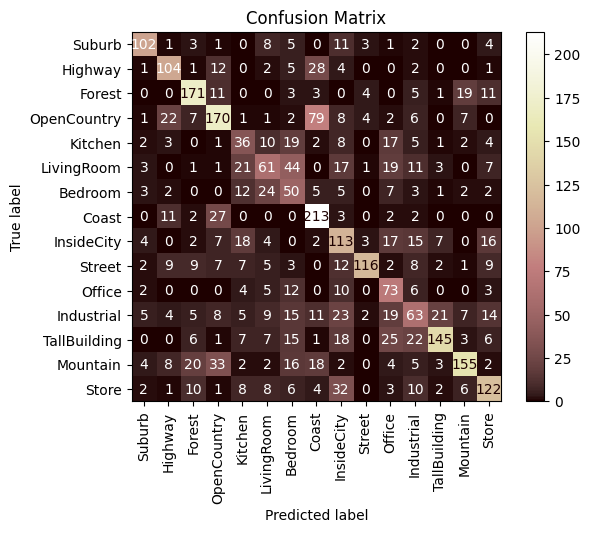

In [69]:
test_model(model, test_loader, criterion)

## Batch Normalization + Adam + Dropout
Kernel Size = 3


In [70]:
model = Model(kernel_size=3, normalization=True, dropout=True)
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters())

In [71]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, early_stopping=True)

 39%|█████        | 39/100 [00:07<00:12,  5.03it/s, Train Loss=0.722, Test Loss=5.94, Train Acc=0.746, Test Acc=0.0756]

Stopped early, epoch: 39


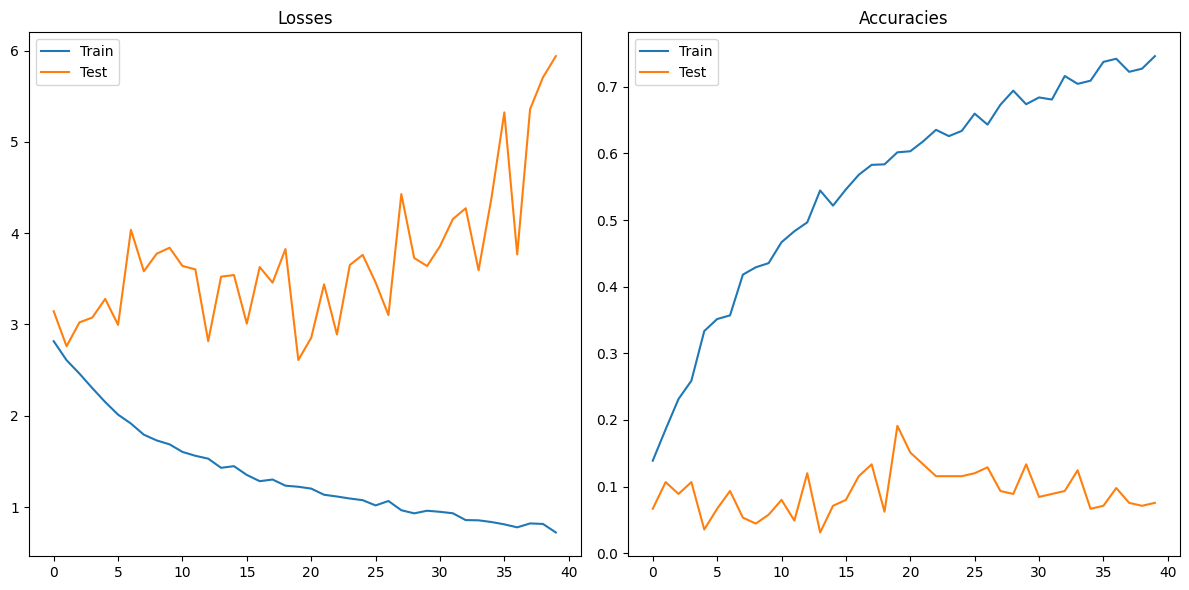

In [72]:
plot_statistics(statistics)

Test Loss: 5.225019931793213
Test Accuracy: 0.07973199337720871


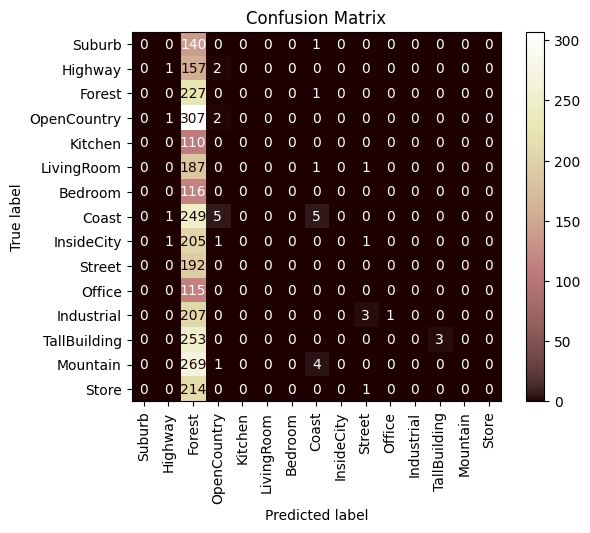

In [73]:
test_model(model, test_loader, criterion)

## Batch Normalization + Adam + Ensemble
Kernel Size = 3


In [74]:
models = []

for _ in range(10):
    model = Model(kernel_size=3, normalization=True)
    model.net.apply(init_weights)

    models.append(model)

criterion = th.nn.CrossEntropyLoss()

In [75]:
statistics = []
for i, model in enumerate(models):
    print(f"Model {i}")
    optimizer = th.optim.Adam(model.parameters())
        
    statistic = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100, early_stopping=True)
    statistics.append(statistic)

Model 0


 49%|██████▊       | 49/100 [00:09<00:09,  5.22it/s, Train Loss=0.0758, Test Loss=4.4, Train Acc=0.974, Test Acc=0.382]


Stopped early, epoch: 49
Model 1


 31%|████         | 31/100 [00:05<00:13,  5.20it/s, Train Loss=0.0285, Test Loss=1.92, Train Acc=0.999, Test Acc=0.547]


Stopped early, epoch: 31
Model 2


 27%|███▌         | 27/100 [00:05<00:14,  5.17it/s, Train Loss=0.0261, Test Loss=2.58, Train Acc=0.998, Test Acc=0.573]


Stopped early, epoch: 27
Model 3


 28%|████▏          | 28/100 [00:05<00:13,  5.18it/s, Train Loss=0.028, Test Loss=1.6, Train Acc=0.999, Test Acc=0.604]


Stopped early, epoch: 28
Model 4


 33%|████▌         | 33/100 [00:06<00:12,  5.21it/s, Train Loss=0.0219, Test Loss=2.2, Train Acc=0.999, Test Acc=0.498]


Stopped early, epoch: 33
Model 5


 42%|█████▍       | 42/100 [00:08<00:11,  5.24it/s, Train Loss=0.0116, Test Loss=2.91, Train Acc=0.999, Test Acc=0.569]


Stopped early, epoch: 42
Model 6


 32%|████▏        | 32/100 [00:06<00:13,  5.20it/s, Train Loss=0.0385, Test Loss=3.31, Train Acc=0.991, Test Acc=0.511]


Stopped early, epoch: 32
Model 7


 28%|█████             | 28/100 [00:05<00:14,  5.02it/s, Train Loss=0.025, Test Loss=1.84, Train Acc=1, Test Acc=0.591]


Stopped early, epoch: 28
Model 8


 40%|█████▏       | 40/100 [00:07<00:11,  5.26it/s, Train Loss=0.0139, Test Loss=2.17, Train Acc=0.999, Test Acc=0.533]


Stopped early, epoch: 40
Model 9


 29%|████          | 29/100 [00:05<00:13,  5.21it/s, Train Loss=0.0619, Test Loss=4.33, Train Acc=0.99, Test Acc=0.427]

Stopped early, epoch: 29


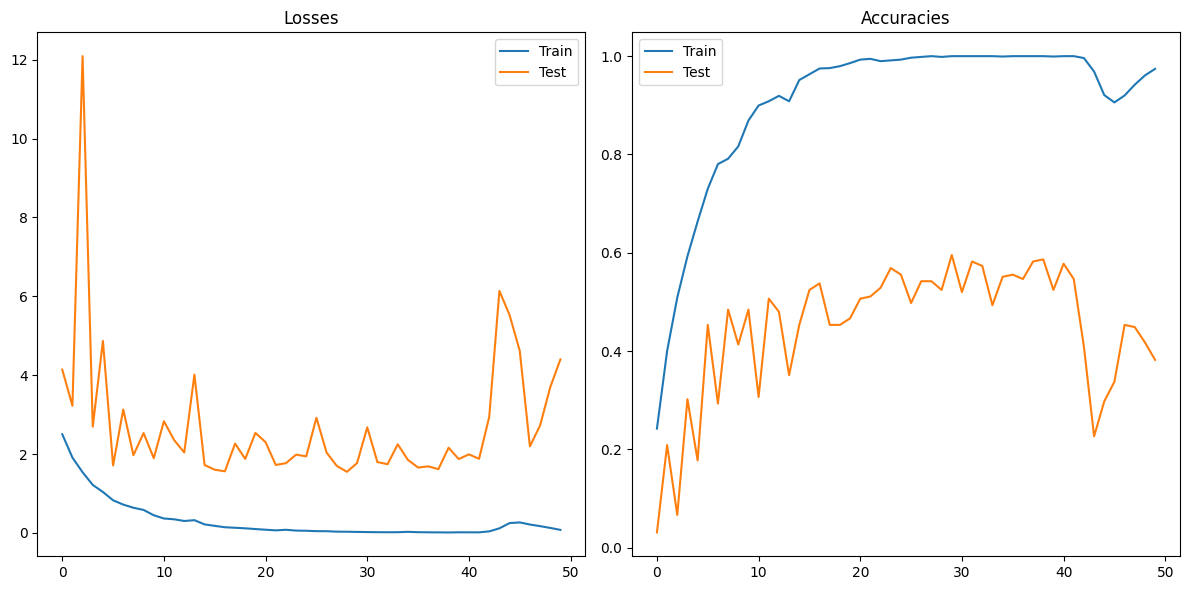

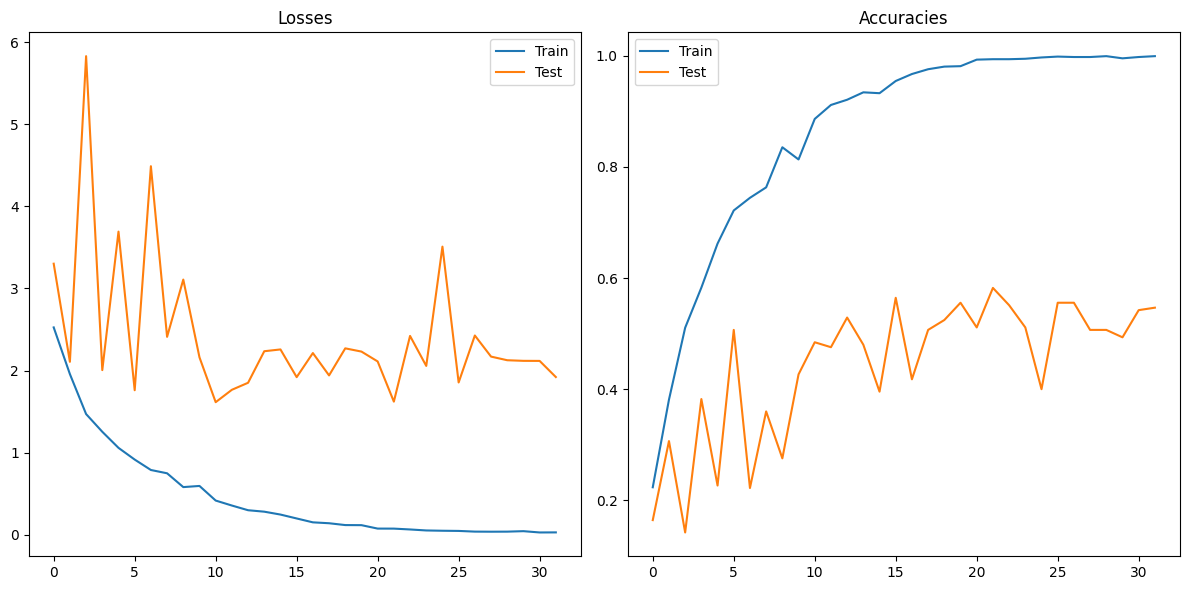

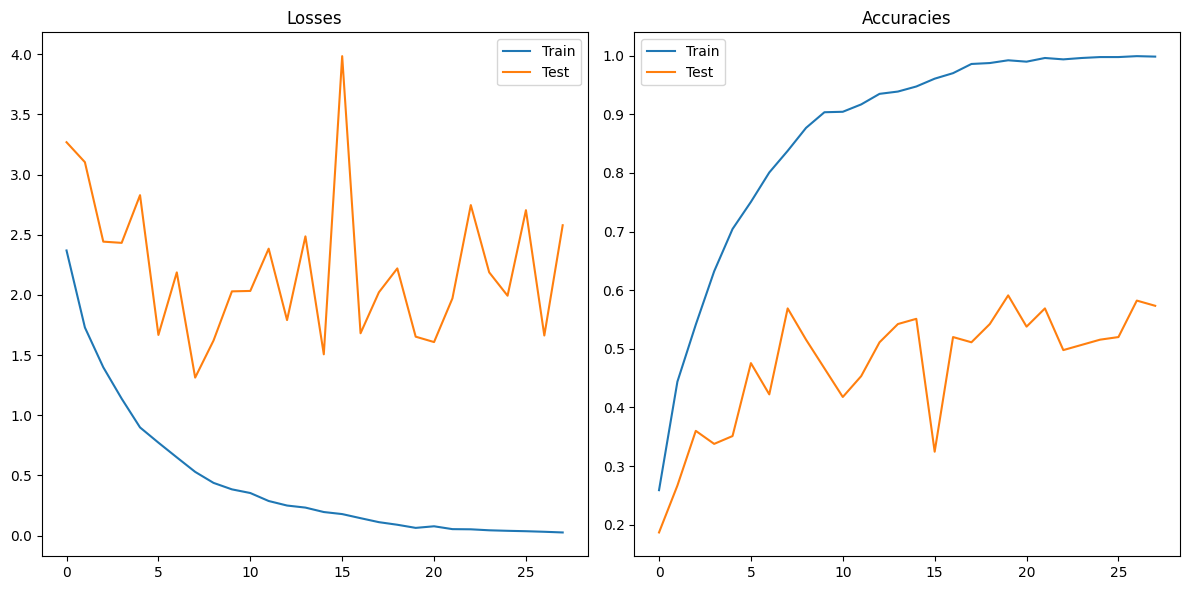

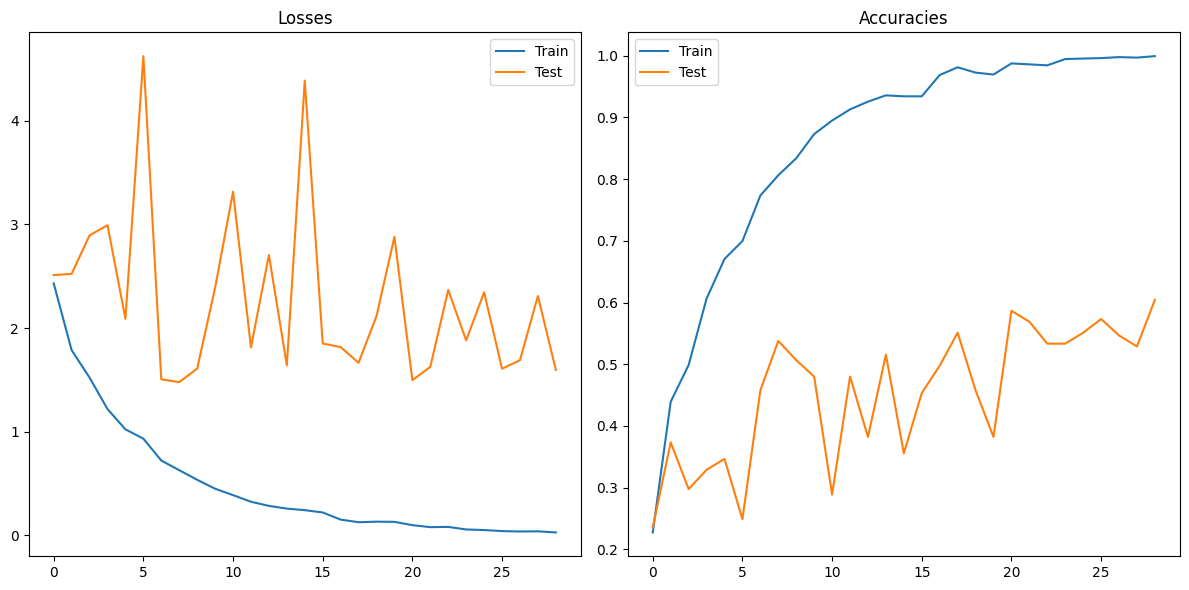

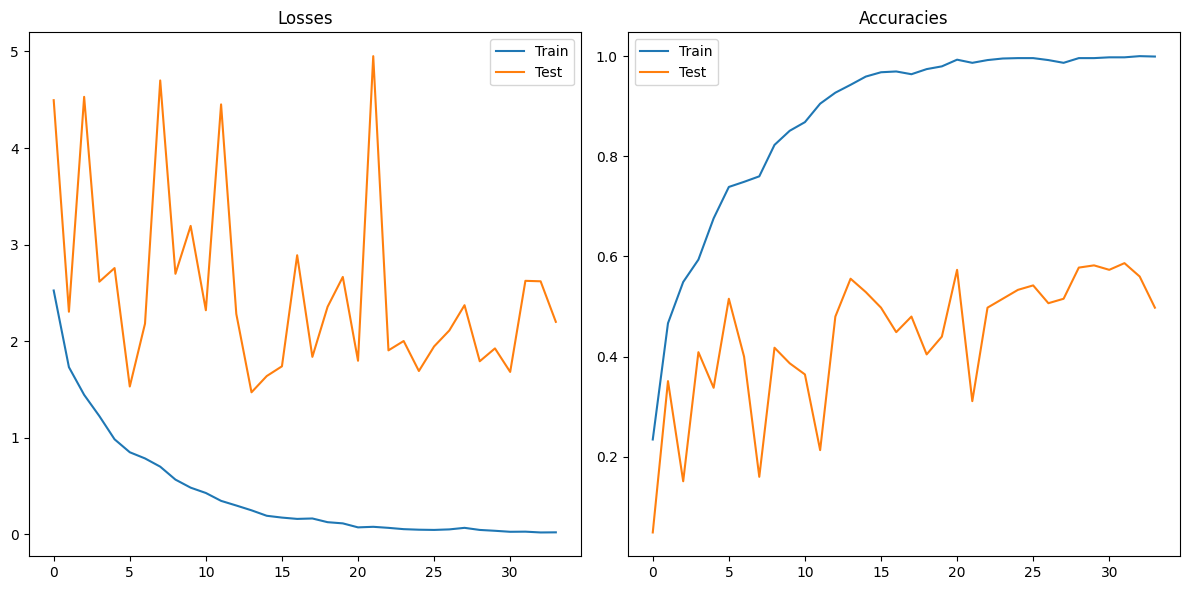

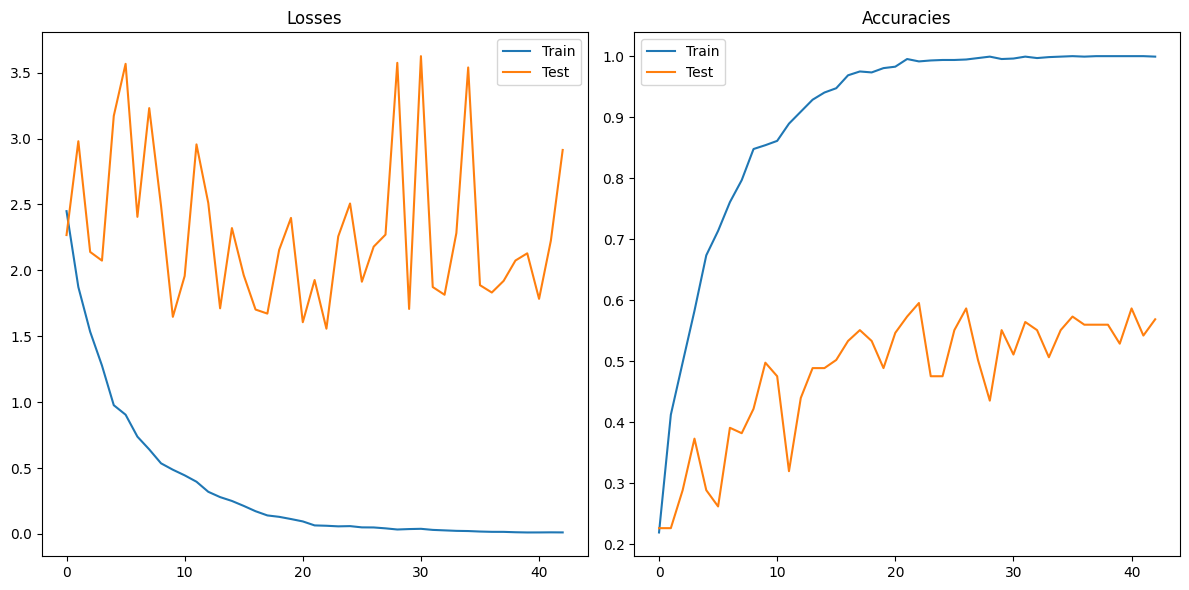

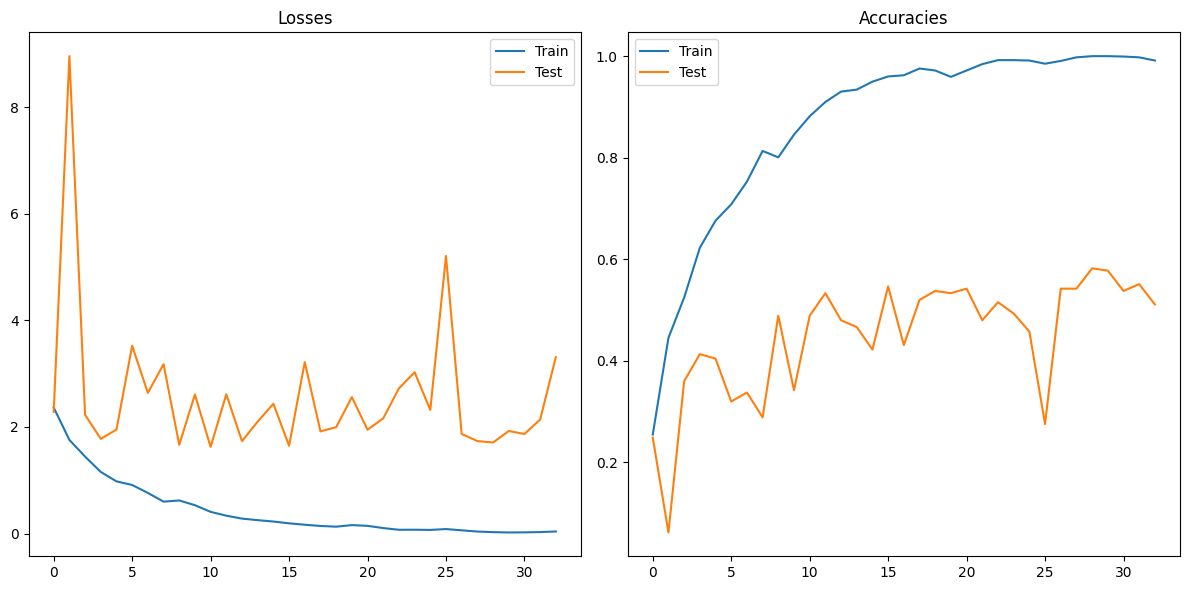

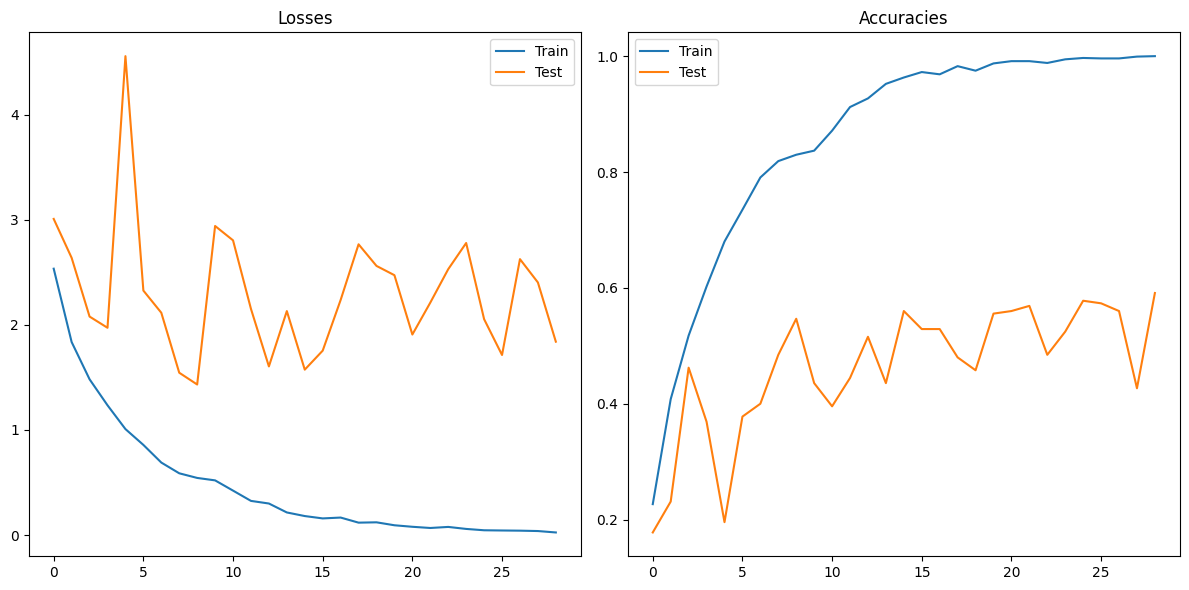

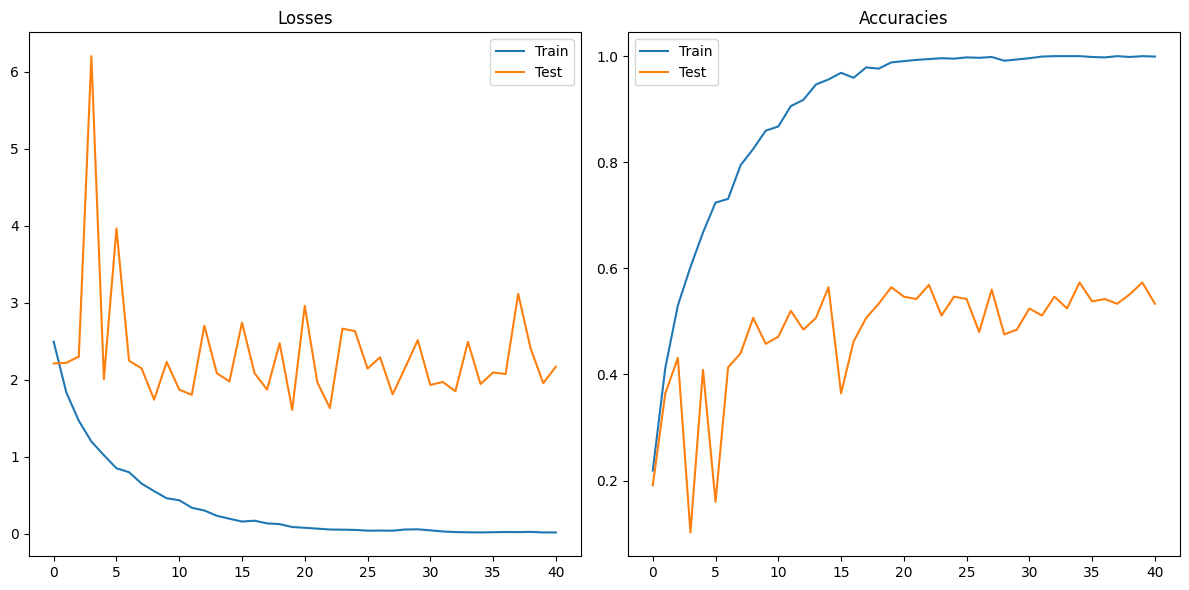

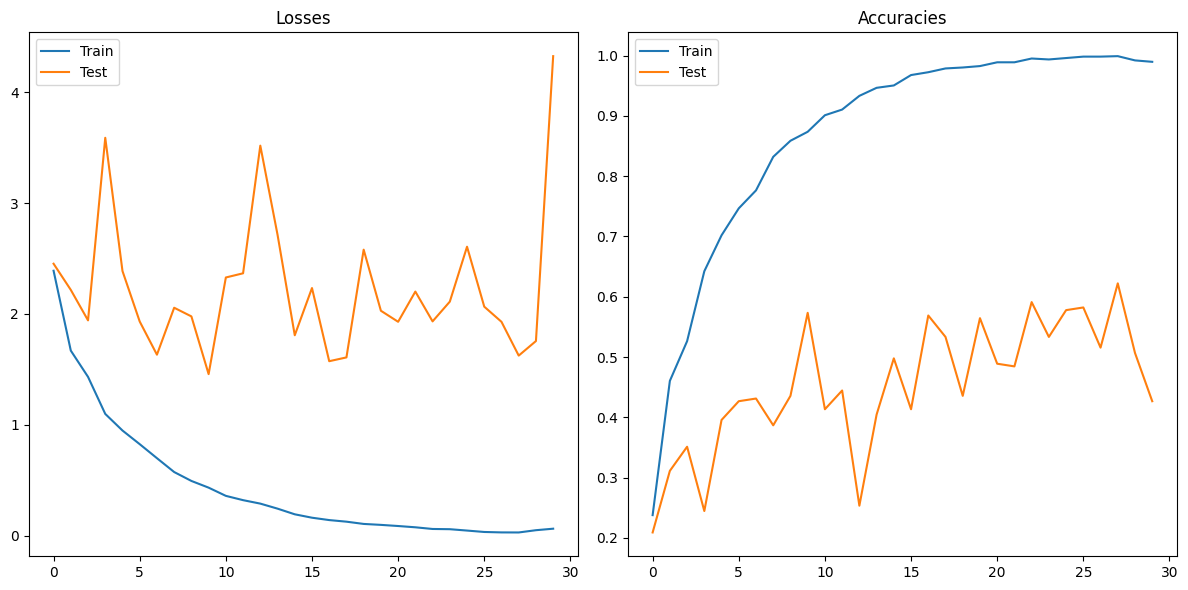

In [76]:
for statistic in statistics:
    plot_statistics(statistic)

Test Loss: 3.1506168842315674
Test Accuracy: 0.4053601324558258


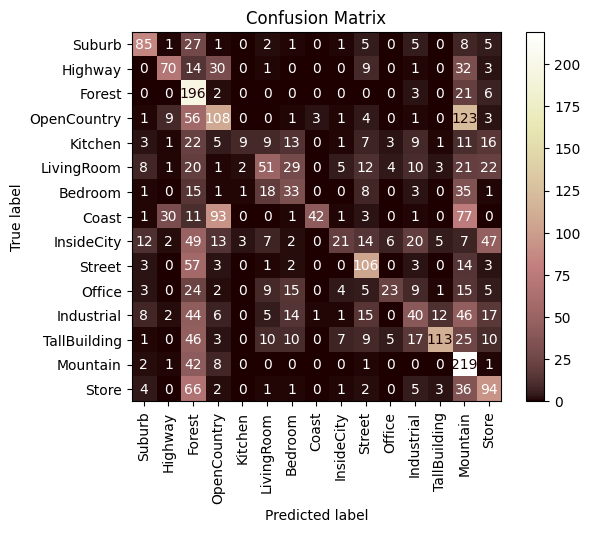

In [77]:
test_model(model, test_loader, criterion)

# Exercise 3

In [20]:
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Lambda(lambda x: x / 255),
    transforms.Normalize(
        mean=[0.4559, 0.4559, 0.4559],             # Normalize with ImageNet mean
        std=[0.2355, 0.2355, 0.2355]               # Normalize with ImageNet std
    )
])
test_transform = transforms.Compose([
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda x: x / 255),
    transforms.Normalize(
        mean=[0.4559, 0.4559, 0.4559],             # Normalize with ImageNet mean
        std=[0.2355, 0.2355, 0.2355]               # Normalize with ImageNet std
    )
])

In [21]:
train_loader, validation_loader, test_loader = customDataloader(transform=[transform, test_transform], batch_size=32, shuffle=True)

## Fine Tuning

In [87]:
model = alexnet(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.classifier[6] = th.nn.Linear(4096, 15, bias=True)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.6)

In [88]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=50)

100%|██████████████| 50/50 [01:49<00:00,  2.18s/it, Train Loss=0.625, Test Loss=0.726, Train Acc=0.859, Test Acc=0.791]


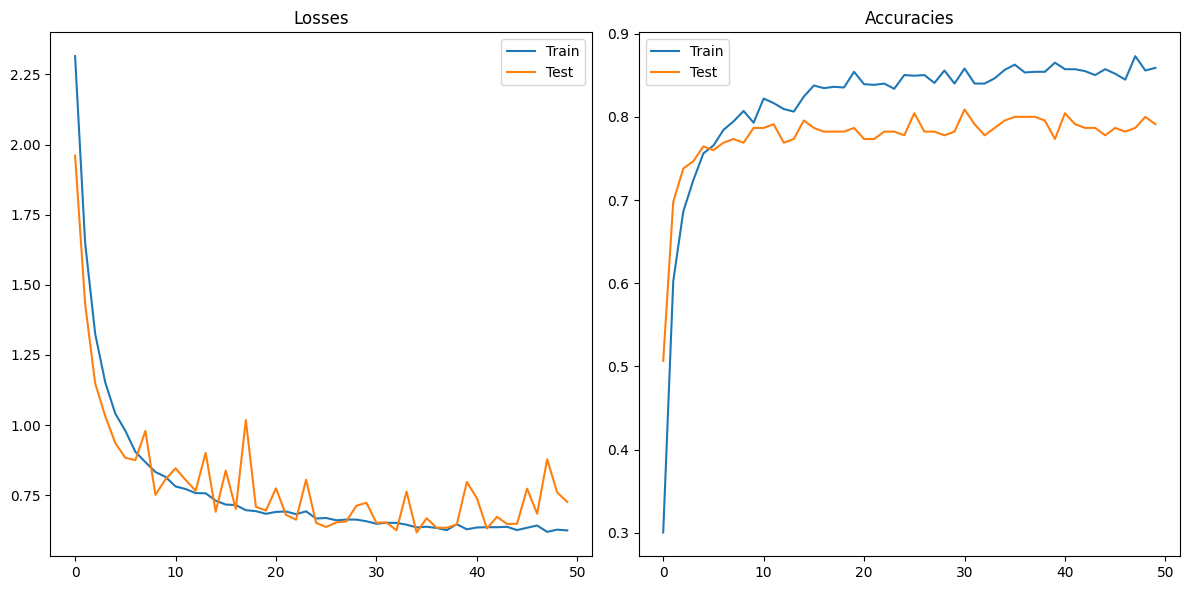

In [89]:
plot_statistics(statistics)

Test Loss: 0.7020344734191895
Test Accuracy: 0.8026800751686096


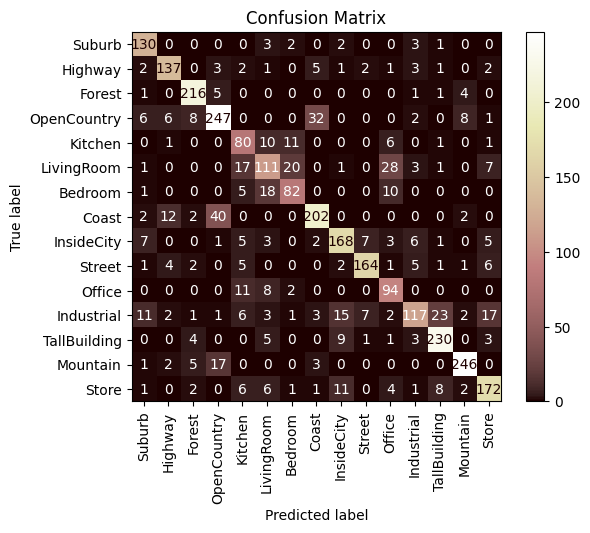

In [90]:
test_model(model, test_loader, criterion)

## SVM

In [22]:
from src.feature_extractor import extract_svm_inputs
DEVICE = th.device("cuda" if th.cuda.is_available() else "cpu")

model = alexnet(pretrained=True).to(DEVICE)
model.eval()

train_data, validation_data, test_data = extract_svm_inputs(model, train_loader, validation_loader, test_loader)

In [23]:
train_data = list(train_data)
train_data[0] = th.cat((train_data[0], validation_data[0]))
train_data[1] = th.cat((train_data[1], validation_data[1]))

In [24]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

In [25]:
svm.fit(train_data[0], train_data[1])

LinearSVC()

In [26]:
y_hat = svm.predict(test_data[0])

In [27]:
from src.plots import custom_confusion_matrix

Accuracy:  0.7688442468643188


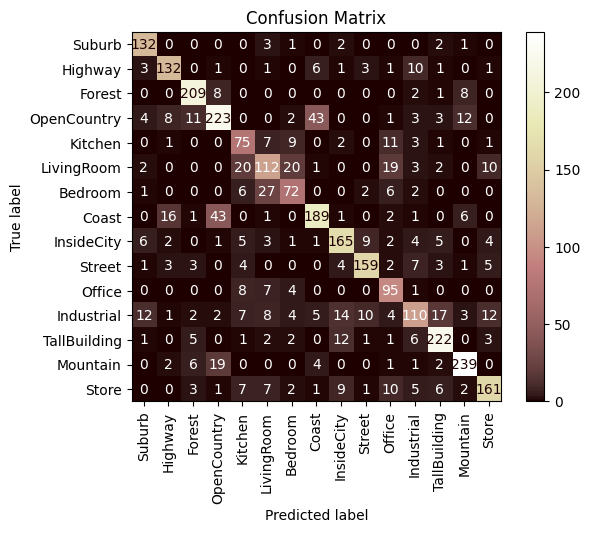

In [28]:
print("Accuracy: ", (test_data[1] == y_hat).float().mean().item())
custom_confusion_matrix(test_data[1], y_hat)

# Exercise 4

## Applied to ex2

In [3]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=0.1)
])
test_transform = None

In [4]:
train_loader, validation_loader, test_loader = customDataloader(transform=[transform, test_transform], batch_size=32, shuffle=True, crop=True)

In [12]:
model = Model(kernel_size=3, normalization=True, dropout=True)
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.5)

In [13]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=100)

100%|██████████████| 100/100 [01:30<00:00,  1.11it/s, Train Loss=2.02, Test Loss=2.62, Train Acc=0.385, Test Acc=0.187]


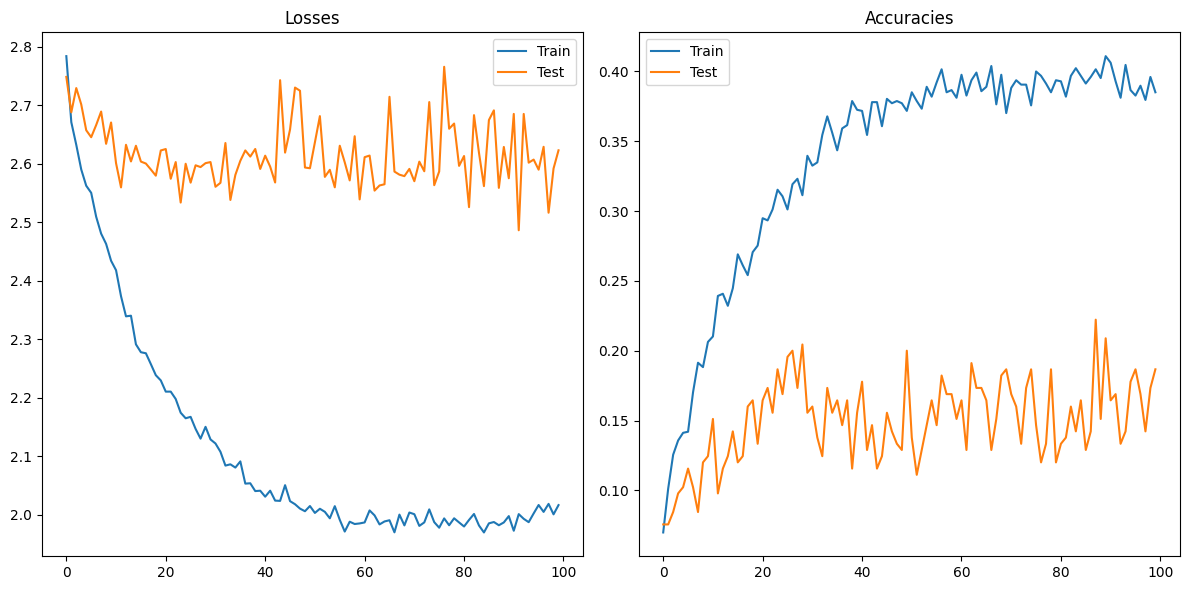

In [14]:
plot_statistics(statistics)

Test Loss: 2.586085796356201
Test Accuracy: 0.12998324632644653


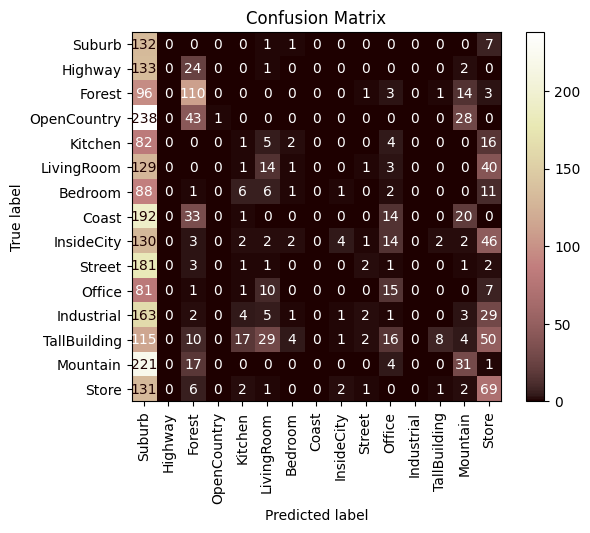

In [15]:
test_model(model, test_loader, criterion)

## Applied to ex3

In [22]:
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=0.1),
    transforms.Lambda(lambda x: x / 255),
    transforms.Normalize(
        mean=[0.4559, 0.4559, 0.4559],             # Normalize with ImageNet mean
        std=[0.2355, 0.2355, 0.2355]               # Normalize with ImageNet std
    )
])
test_transform = transforms.Compose([
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda x: x / 255),
    transforms.Normalize(
        mean=[0.4559, 0.4559, 0.4559],             # Normalize with ImageNet mean
        std=[0.2355, 0.2355, 0.2355]               # Normalize with ImageNet std
    )
])

In [23]:
train_loader, validation_loader, test_loader = customDataloader(transform=[transform, test_transform], batch_size=32, shuffle=True, crop=True)

In [30]:
model = alexnet(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.classifier[6] = th.nn.Linear(4096, 15, bias=True)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.1)

In [31]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=50)

100%|███████████████| 50/50 [03:33<00:00,  4.26s/it, Train Loss=0.841, Test Loss=1.57, Train Acc=0.795, Test Acc=0.489]


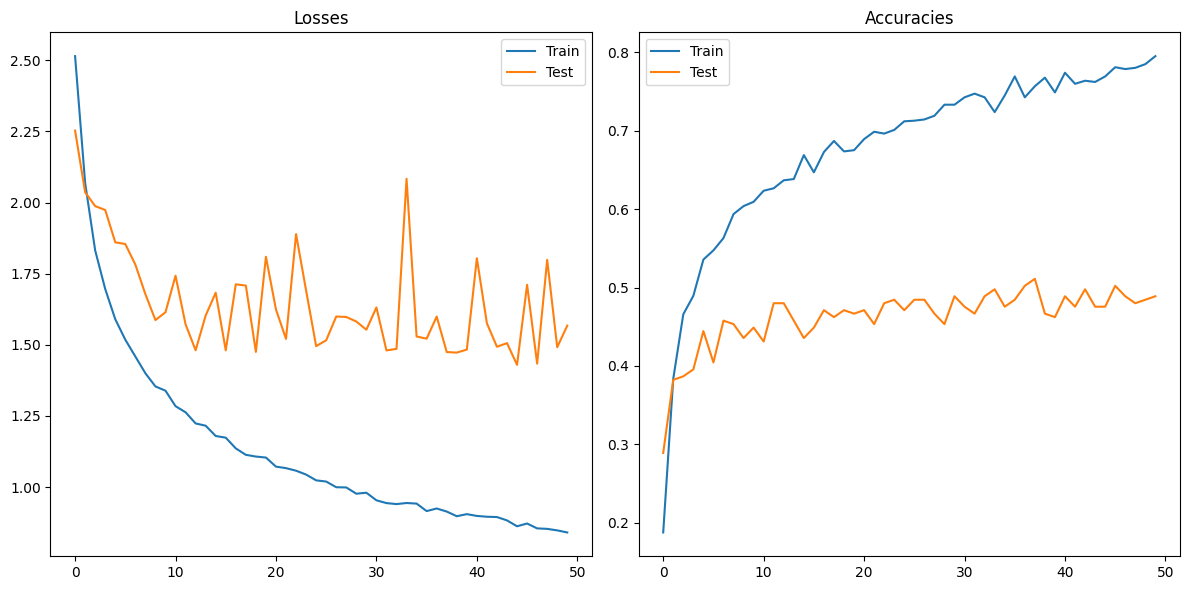

In [32]:
plot_statistics(statistics)

Test Loss: 1.3798540830612183
Test Accuracy: 0.5172529220581055


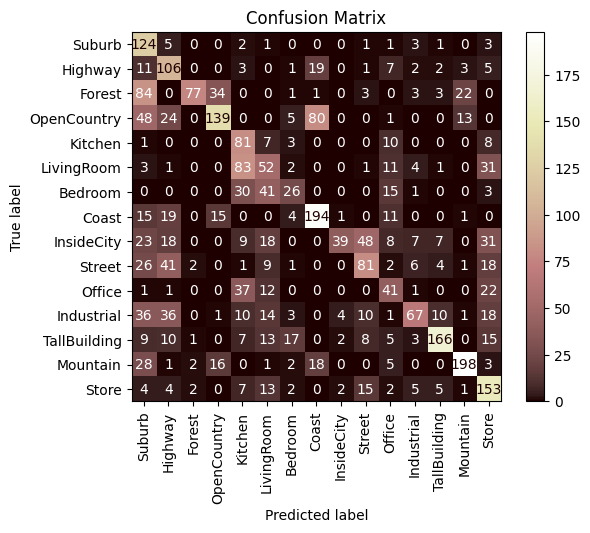

In [33]:
test_model(model, test_loader, criterion)

# Exercise 5

In [13]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=0.1)
])
test_transform = None

In [14]:
train_loader, validation_loader, test_loader = customDataloader(transform=[transform, test_transform], batch_size=32, shuffle=True, crop=True)

In [15]:
model = Model(kernel_size=3, normalization=True, dropout=True, additional=True)
model.net.apply(init_weights)

criterion = th.nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters(), lr=1e-4)

In [16]:
statistics = train_loop(model, train_loader, validation_loader, criterion, optimizer, num_epochs=200)

100%|██████████████| 200/200 [03:12<00:00,  1.04it/s, Train Loss=1.73, Test Loss=3.29, Train Acc=0.428, Test Acc=0.111]


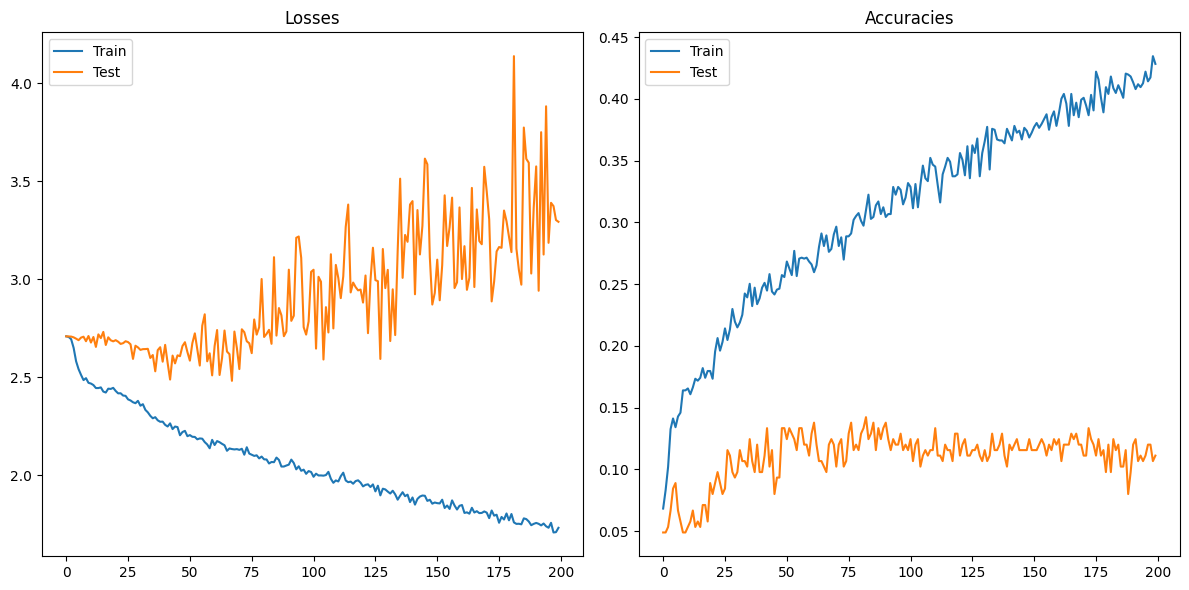

In [17]:
plot_statistics(statistics)

Test Loss: 2.7506160736083984
Test Accuracy: 0.15510888397693634


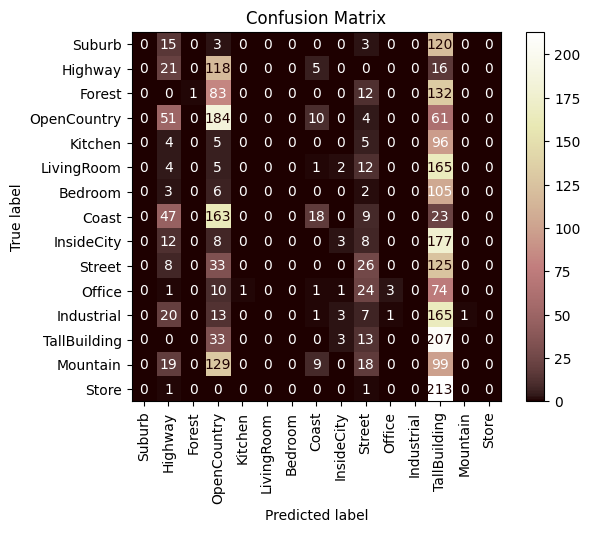

In [18]:
test_model(model, test_loader, criterion)

# Exercise 6

In [3]:
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Lambda(lambda x: x / 255),
    transforms.Normalize(
        mean=[0.4559, 0.4559, 0.4559],             # Normalize with ImageNet mean
        std=[0.2355, 0.2355, 0.2355]               # Normalize with ImageNet std
    )
])
test_transform = transforms.Compose([
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda x: x / 255),
    transforms.Normalize(
        mean=[0.4559, 0.4559, 0.4559],             # Normalize with ImageNet mean
        std=[0.2355, 0.2355, 0.2355]               # Normalize with ImageNet std
    )
])

In [4]:
train_loader, validation_loader, test_loader = customDataloader(transform=[transform, test_transform], batch_size=32, shuffle=True)

In [5]:
from src.feature_extractor import extract_svm_inputs
DEVICE = th.device("cuda" if th.cuda.is_available() else "cpu")

model = alexnet(pretrained=True).to(DEVICE)
model.eval()

train_data, validation_data, test_data = extract_svm_inputs(model, train_loader, validation_loader, test_loader)

/orfeo/cephfs/home/dssc/stumino/projects/CV/Project/lib64/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/orfeo/cephfs/home/dssc/stumino/projects/CV/Project/lib64/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
train_data = list(train_data)
train_data[0] = th.cat((train_data[0], validation_data[0]))
train_data[1] = th.cat((train_data[1], validation_data[1]))

In [31]:
from sklearn.svm import SVC

linear_svm = SVC(kernel="linear")
rbf_svm    = SVC(kernel="rbf")
poly_svm   = SVC(kernel="poly")

In [32]:
linear_svm.fit(train_data[0], train_data[1])
rbf_svm.fit(train_data[0], train_data[1])
poly_svm.fit(train_data[0], train_data[1])

SVC(kernel='poly')

In [33]:
y_hat_linear = linear_svm.predict(test_data[0])
y_hat_rbf    = rbf_svm.predict(test_data[0])
y_hat_poly   = rbf_svm.predict(test_data[0])

In [34]:
from src.plots import custom_confusion_matrix

Accuracy:  0.7621440291404724


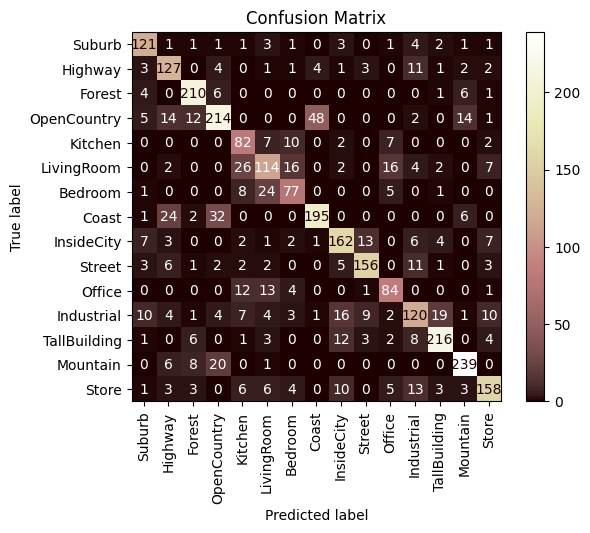

In [35]:
print("Accuracy: ", (test_data[1] == y_hat_linear).float().mean().item())
custom_confusion_matrix(test_data[1], y_hat_linear)

Accuracy:  0.7644891142845154


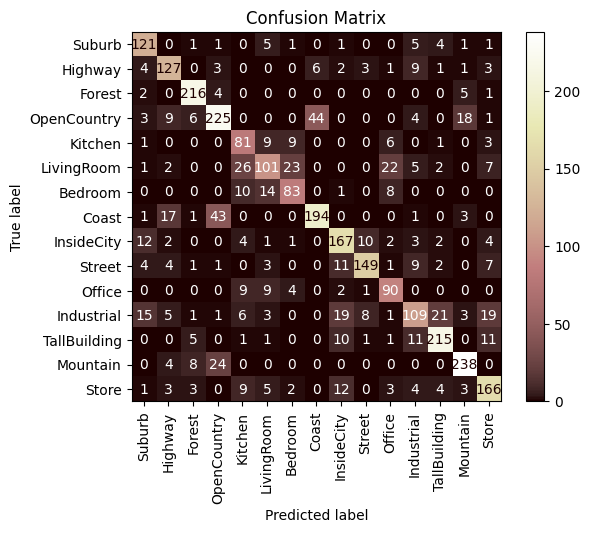

In [36]:
print("Accuracy: ", (test_data[1] == y_hat_poly).float().mean().item())
custom_confusion_matrix(test_data[1], y_hat_poly)

Accuracy:  0.7644891142845154


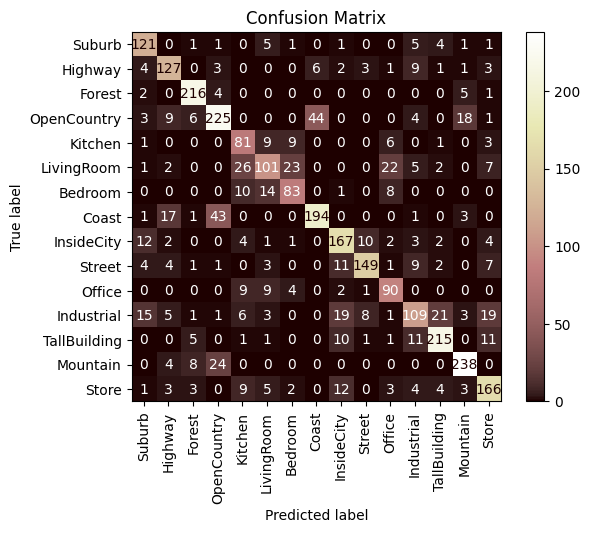

In [37]:
print("Accuracy: ", (test_data[1] == y_hat_rbf).float().mean().item())
custom_confusion_matrix(test_data[1], y_hat_rbf)